# Todo:
    - Correct labels
    - Open window to chose file
    - Create Dataframe for each key, check each dataframe for how it's formatted and what values does it hold
    - Timezone, duration, sleep_deep_duration, sleep_light_duration, sleep_rem_duration, sleep_awake_duration values not properly evaluated
    - Save data_full to a proper CSV, check what values appear together
    -Fix sns.regplot

In [1]:
import pandas as pd
import seaborn as sns
import json
import datetime as dt

In [2]:

#Read the file and save it to variable
with open("D:\\MEGA\\Python\\Proyectos-varios-python\\MiWatch-data\\MiFitness_data\\20230217_6387537928_MiFitness_hlth_center_fitness_data.csv") as f:
    data = pd.read_csv(f, usecols=["Key","Value"],dtype={"Key":pd.StringDtype(), "Value":pd.StringDtype()})

In [3]:
# Convert each dict in the value column to a readable dict (it's read as a string)
values = [json.loads(row) for row in data["Value"]]

In [4]:
#Convert values to a dataframe and concat to the original for filtering
values = pd.DataFrame.from_dict(values)
data_raw = pd.concat([data["Key"], values], axis= 1)
data_raw.head()

,Key,date_time,bpm,time,weight,energy,state,state_value,spo2,stress,...,sleep_summary,sleep_advice,recover_score,nervous_score,awake_count,friendly_score,items,prev_bpm,bmi,sid
0,resting_heart_rate,1.613174e+09,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,weight,NaN,NaN,1.613240e+09,88.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,energy,NaN,NaN,1.613240e+09,NaN,25.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,energy,NaN,NaN,1.613240e+09,NaN,25.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,energy,NaN,NaN,1.613240e+09,NaN,25.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Each column should be in datetime format 
timecols = ["time","date_time","start_time","end_time","bedtime","wake_up_time","timezone","duration","sleep_deep_duration","sleep_light_duration","sleep_rem_duration","sleep_awake_duration"]
data_full = data_raw.copy()
for timecol in timecols:
    data_full[timecol] = pd.to_datetime(data_raw[timecol], unit="s")
data_full.head()

,Key,date_time,bpm,time,weight,energy,state,state_value,spo2,stress,...,sleep_summary,sleep_advice,recover_score,nervous_score,awake_count,friendly_score,items,prev_bpm,bmi,sid
0,resting_heart_rate,2021-02-13,92.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,weight,NaT,NaN,2021-02-13 18:13:33,88.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,energy,NaT,NaN,2021-02-13 18:17:00,NaN,25.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,energy,NaT,NaN,2021-02-13 18:18:00,NaN,25.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,energy,NaT,NaN,2021-02-13 18:19:00,NaN,25.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
keys = pd.unique(data_raw["Key"])
keys

<StringArray>
[ 'resting_heart_rate',              'weight',              'energy',
          'heart_rate',         'single_spo2',              'stress',
         'valid_stand',               'steps',             'vo2_max',
   'watch_night_sleep',            'calories', 'abnormal_heart_rate',
      'max_heart_rate',      'min_heart_rate',           'intensity']
Length: 15, dtype: string

,time,steps,times
99,2021-02-13 19:17:00,5.0,2023-03-14 19:17:00
102,2021-02-13 19:18:00,8.0,2023-03-14 19:18:00
105,2021-02-13 19:19:00,10.0,2023-03-14 19:19:00
107,2021-02-13 19:20:00,5.0,2023-03-14 19:20:00
109,2021-02-13 19:21:00,48.0,2023-03-14 19:21:00


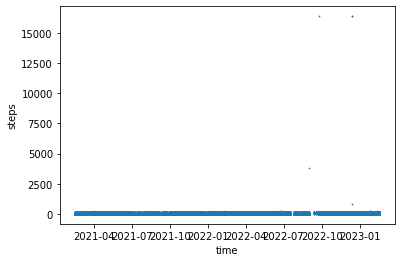

In [7]:
plotdata = "steps"
data_plot = data_full[["time",plotdata]].copy()
data_plot.dropna(inplace=True)
times = [dt.datetime.combine(dt.datetime.today(),row) for row in data_plot["time"].dt.time]
data_plot["times"] = times
data_plot.plot(x="time", y= plotdata, kind="scatter", s=0.5)#, ylim= (0,500))
data_plot.head()

In [8]:
print(keys)
key = 'watch_night_sleep'
data_key = data_full[data_full["Key"] == key].copy()
data_key.dropna(axis= 1, inplace=True)
data_key.head()

<StringArray>
[ 'resting_heart_rate',              'weight',              'energy',
          'heart_rate',         'single_spo2',              'stress',
         'valid_stand',               'steps',             'vo2_max',
   'watch_night_sleep',            'calories', 'abnormal_heart_rate',
      'max_heart_rate',      'min_heart_rate',           'intensity']
Length: 15, dtype: string


,Key,date_time,bedtime,wake_up_time,timezone,duration,sleep_deep_duration,sleep_light_duration,sleep_rem_duration,sleep_awake_duration,total_score,quality_score,duration_score,sleep_summary,sleep_advice,recover_score,nervous_score,awake_count,friendly_score,items
721,watch_night_sleep,2021-02-14,2021-02-14 00:10:00,2021-02-14 07:20:00,1970-01-01 00:00:04,1970-01-01 00:07:10,1970-01-01 00:00:28,1970-01-01 00:04:56,1970-01-01 00:01:46,1970-01-01 00:00:00,76.0,69.0,73.0,102.0,118.0,69.0,33.0,0.0,76.0,"[{'start_time': 1613261400, 'end_time': 161326..."
4220,watch_night_sleep,2021-02-15,2021-02-14 23:01:00,2021-02-15 06:32:00,1970-01-01 00:00:04,1970-01-01 00:07:04,1970-01-01 00:00:30,1970-01-01 00:05:09,1970-01-01 00:01:25,1970-01-01 00:00:27,73.0,66.0,67.0,112.0,113.0,91.0,9.0,2.0,73.0,"[{'start_time': 1613343660, 'end_time': 161334..."
7197,watch_night_sleep,2021-02-16,2021-02-16 00:11:00,2021-02-16 07:10:00,1970-01-01 00:00:04,1970-01-01 00:06:59,1970-01-01 00:01:00,1970-01-01 00:04:20,1970-01-01 00:00:48,1970-01-01 00:00:51,77.0,72.0,44.0,8.0,4.0,100.0,39.0,2.0,77.0,"[{'start_time': 1613434260, 'end_time': 161343..."
10393,watch_night_sleep,2021-02-17,2021-02-17 01:09:00,2021-02-17 07:39:00,1970-01-01 00:00:04,1970-01-01 00:06:30,1970-01-01 00:00:42,1970-01-01 00:03:31,1970-01-01 00:01:53,1970-01-01 00:00:24,76.0,67.0,43.0,8.0,4.0,74.0,64.0,2.0,76.0,"[{'start_time': 1613524140, 'end_time': 161352..."
13713,watch_night_sleep,2021-02-18,2021-02-17 22:08:00,2021-02-18 06:00:00,1970-01-01 00:00:04,1970-01-01 00:07:52,1970-01-01 00:00:38,1970-01-01 00:05:15,1970-01-01 00:01:18,1970-01-01 00:00:41,66.0,50.0,64.0,112.0,113.0,77.0,12.0,4.0,66.0,"[{'start_time': 1613599680, 'end_time': 161360..."


In [9]:
data_keys = {}
for key in keys:
    data_keys[key] = data_full[data_full["Key"]== key].copy()
    data_keys[key].dropna(axis= 1, how= "all", inplace= True)
    #data_keys[key].to_csv(str(key)+".csv") #Uncomment to save a bunch of CSV files
    print(data_keys[key].head())

                      Key  date_time   bpm
0      resting_heart_rate 2021-02-13  92.0
719    resting_heart_rate 2021-02-14  75.0
3977   resting_heart_rate 2021-02-15  67.0
7196   resting_heart_rate 2021-02-16  66.0
10395  resting_heart_rate 2021-02-17  58.0
           Key                time  weight  bmi
1       weight 2021-02-13 18:13:33    88.0  NaN
218440  weight 2021-04-23 12:16:37    91.3  NaN
240027  weight 2021-04-30 09:10:56    89.5  NaN
829330  weight 2021-11-01 17:40:39    89.9  NaN
832372  weight 2021-11-02 17:01:13    90.0  NaN
      Key                time  energy  state  state_value
2  energy 2021-02-13 18:17:00    25.0    0.0          0.0
3  energy 2021-02-13 18:18:00    25.0    0.0          0.0
4  energy 2021-02-13 18:19:00    25.0    0.0          0.0
6  energy 2021-02-13 18:20:00     0.0    0.0          0.0
7  energy 2021-02-13 18:21:00     0.0    0.0          0.0
           Key    bpm                time
5   heart_rate   94.0 2021-02-13 18:19:00
24  heart_rate  113.0 

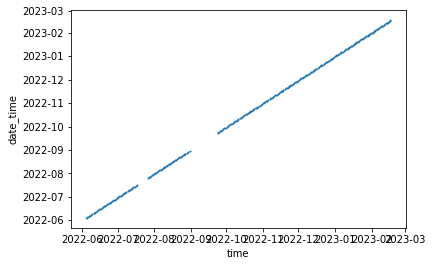

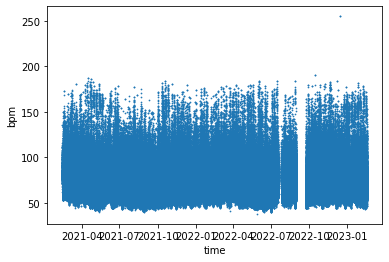

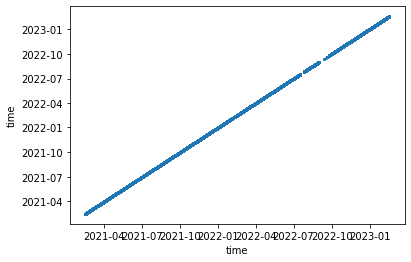

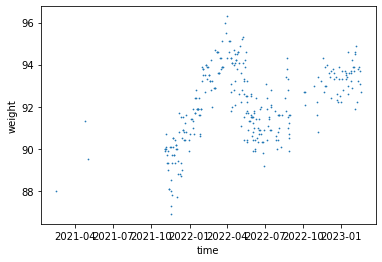

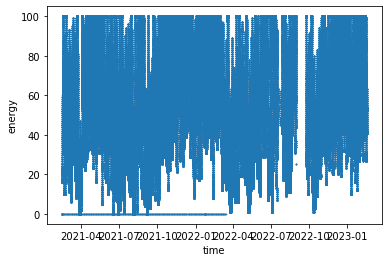

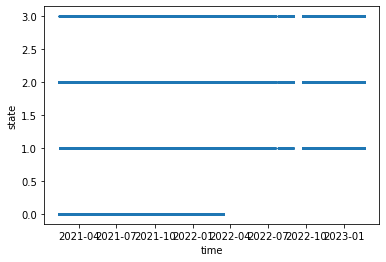

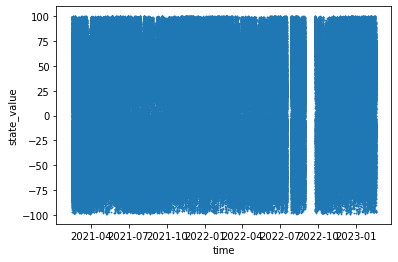

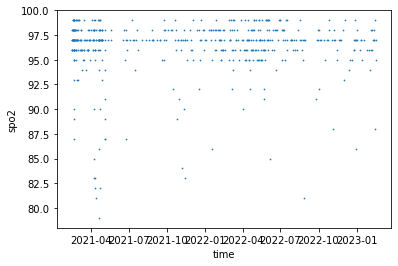

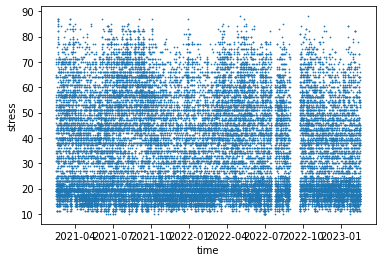

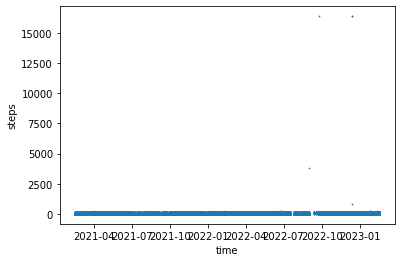

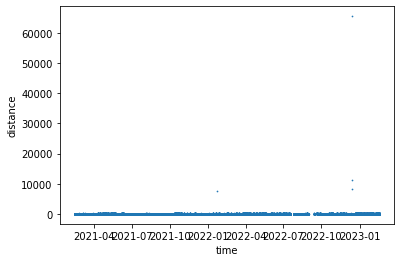

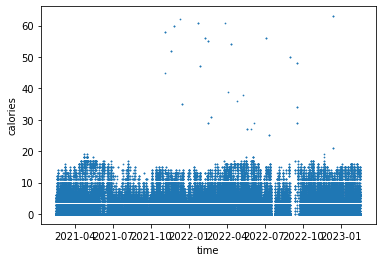

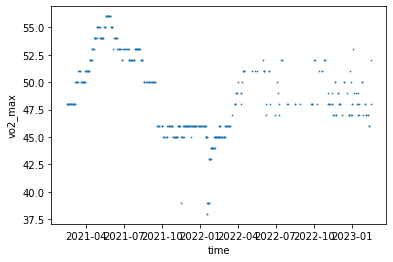

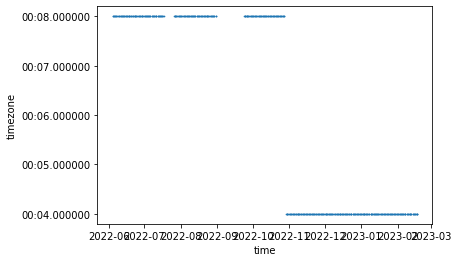

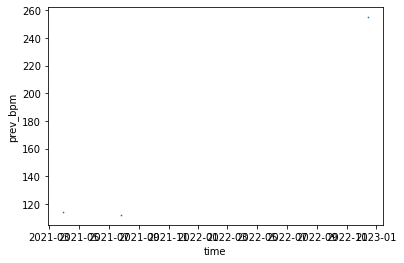

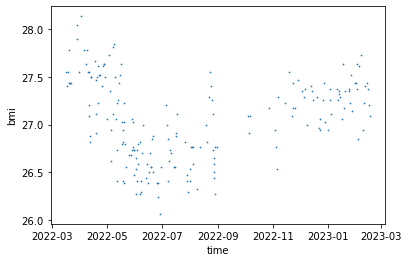

In [10]:
plotcolumns = ['date_time', 'bpm', 'time', 'weight', 'energy', 'state',
       'state_value', 'spo2', 'stress', 'steps',
       'distance', 'calories', 'vo2_max',
       'timezone', 'prev_bpm', 'bmi']
for column in plotcolumns:
       data_full.plot(x="time", y=column , kind="scatter", s=0.5)
       

## Columns plotted against time:
- date_time
- bpm
- time
- weight
- energy
- state
- state_value
- spo2
- stress
- steps
- distance
- calories
- vo2_max
- timezone
- prev_bpm
- bmi

plotcolumns = ['bpm', 'weight', 'energy', 'state',
       'state_value', 'spo2', 'stress', 'steps',
       'distance', 'calories', 'vo2_max',
       'timezone', 'prev_bpm', 'bmi']

date_time
bpm
time
weight
energy
state
state_value
spo2
stress
steps
distance
calories
vo2_max
timezone
prev_bpm
bmi


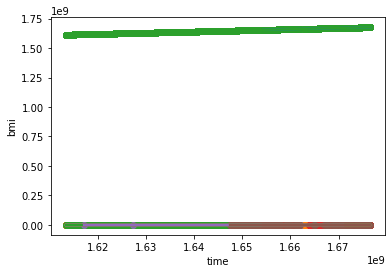

In [11]:
for column in plotcolumns:
    print(column)
    sns.regplot(data=data_raw, x='time',y=column)    